In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

## Pobranie danych

In [2]:
import os
path = os.path.join("parseddata.csv")

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv(path)

In [4]:
data.Q2.isnull().values.any()

False

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     2000 non-null   int64  
 1   Event   2000 non-null   int64  
 2   E1      2000 non-null   float64
 3   px1     2000 non-null   float64
 4   py1     2000 non-null   float64
 5   pz1     2000 non-null   float64
 6   pt1     2000 non-null   float64
 7   eta1    2000 non-null   float64
 8   phi1    1977 non-null   float64
 9   Q1      1967 non-null   float64
 10  E2      1977 non-null   float64
 11  px2     2000 non-null   float64
 12  py2     2000 non-null   float64
 13  pz2     2000 non-null   float64
 14  pt2     2000 non-null   float64
 15  eta2    2000 non-null   float64
 16  phi2    2000 non-null   float64
 17  Q2      2000 non-null   int64  
 18  M       2000 non-null   float64
dtypes: float64(16), int64(3)
memory usage: 297.0 KB


Teraz zamienię inty na stringi żeby potem je naprawić

In [6]:
data.Run = data.Run.astype(str)

In [7]:
data_train, data_test = train_test_split(data, train_size=0.9, shuffle=True)

Sprawdzam jak wyglądają dane

In [8]:
data.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,368546272,9.34051,-2.015710,0.520275,-9.10556,2.08177,-2.181630,2.889000,1.0,19.4326,-11.80940,-9.27687,-12.3330,15.0174,-0.749175,-2.475720,-1,10.02330
1,147115,14990913,5.20570,4.572420,-1.138860,2.21254,4.71212,0.453805,-0.244105,1.0,103.7640,-18.48930,-8.89345,101.7160,20.5170,2.304090,-2.693260,1,27.91160
2,147115,482260690,4.41252,-0.974871,-2.007580,3.80651,2.23176,1.303660,-2.022850,-1.0,90.8150,6.10354,15.58020,89.2601,16.7331,2.375980,1.197420,-1,14.01300
3,147115,166685143,14.12550,-0.440379,-5.169440,-13.13820,5.18817,-1.659180,-1.655780,-1.0,52.9553,-13.36680,-13.59660,-49.4037,19.0667,-1.680540,-2.347670,1,6.74841
4,147115,482102034,47.78880,-14.024100,-13.218200,43.73070,19.27160,1.557920,-2.385770,-1.0,12.2436,3.08141,1.28393,11.7798,3.3382,1.973600,0.394792,-1,16.13420


In [9]:
data.tail()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
1995,147115,262763738,31.42320,-4.81677,18.48960,24.94690,19.10670,1.081900,1.825640,1.0,2.87905,0.918533,-1.97035,1.88757,2.17393,0.785099,-1.13457,1,12.97960
1996,147115,303068443,24.95120,15.00330,-4.27880,19.47190,15.60150,1.046390,-0.277815,-1.0,10.31190,-3.944290,-3.72314,-8.77021,5.42395,-1.257930,-2.38503,1,30.70220
1997,147115,414734899,98.13490,-31.40010,13.97930,-91.91890,34.37130,-1.710090,2.722740,-1.0,4.98165,-1.224380,1.22865,-4.66992,1.73456,-1.716370,2.35446,1,2.82803
1998,147115,403427630,2.66969,-0.59581,-1.92725,1.74871,2.01725,0.784043,-1.870630,-1.0,112.91900,8.054460,22.78790,110.30200,24.16950,2.223070,1.23105,1,17.73640
1999,147115,373027382,29.49230,13.19170,-12.88570,-23.01590,18.44080,-1.046410,-0.773666,-1.0,17.25330,-3.518780,-1.82520,-16.79180,3.96398,-2.150440,-2.66310,1,17.04470


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     2000 non-null   object 
 1   Event   2000 non-null   int64  
 2   E1      2000 non-null   float64
 3   px1     2000 non-null   float64
 4   py1     2000 non-null   float64
 5   pz1     2000 non-null   float64
 6   pt1     2000 non-null   float64
 7   eta1    2000 non-null   float64
 8   phi1    1977 non-null   float64
 9   Q1      1967 non-null   float64
 10  E2      1977 non-null   float64
 11  px2     2000 non-null   float64
 12  py2     2000 non-null   float64
 13  pz2     2000 non-null   float64
 14  pt2     2000 non-null   float64
 15  eta2    2000 non-null   float64
 16  phi2    2000 non-null   float64
 17  Q2      2000 non-null   int64  
 18  M       2000 non-null   float64
dtypes: float64(16), int64(2), object(1)
memory usage: 297.0+ KB


In [11]:
data.describe()

,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1977.000000,1967.000000,1977.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,3.275772e+08,32.583646,0.362022,0.238989,-0.845287,12.407287,-0.038423,0.068352,0.023894,40.343679,-0.013632,0.224399,-0.707894,12.008478,-0.089447,0.026183,0.00000,27.460362
std,1.508022e+08,35.885805,11.160851,11.887759,45.642403,10.585552,1.494036,1.778407,0.999969,41.717796,11.732437,11.032871,55.852992,10.730759,1.773803,1.832277,1.00025,23.335679
min,9.500362e+06,0.834900,-56.895300,-73.517500,-253.916000,0.398498,-2.585940,-3.133880,-1.000000,0.472500,-111.342000,-62.579700,-298.311000,0.277460,-2.586640,-3.141400,-1.00000,2.004170
25%,2.194487e+08,7.633027,-4.173105,-4.574718,-13.365825,3.504293,-1.311073,-1.472760,-1.000000,10.583300,-4.814035,-3.923737,-20.914850,3.482925,-1.943348,-1.590232,-1.00000,11.655375
50%,3.037173e+08,19.021450,0.157162,0.268929,-0.155179,11.886550,-0.031145,0.102301,1.000000,22.982100,-0.314780,0.121675,-0.917953,9.572210,-0.242269,0.048885,0.00000,19.287450
75%,4.610019e+08,45.315975,4.812810,5.320955,12.849025,17.717850,1.193810,1.626180,1.000000,62.782400,4.317110,4.727145,18.184650,17.256750,1.796523,1.689635,1.00000,34.732550
max,6.205406e+08,285.890000,57.078800,103.643000,280.571000,106.337000,2.549170,3.140730,1.000000,303.665000,108.360000,66.940900,272.391000,119.738000,2.575870,3.140660,1.00000,109.903000


Naprawiam NaNy występujące w kolumnach

In [12]:
print(data.Q1.isnull().values.any())
print(data.phi1.isnull().values.any())
print(data.E2.isnull().values.any())

True
True
True


In [13]:
for column in data.columns:
    
    data_train[column].fillna(data_test[column].value_counts().values[0], inplace=True)
    data_test[column].fillna(data_test[column].value_counts().values[0], inplace=True)

In [14]:
print(data.Q1.isnull().values.any())
print(data.phi1.isnull().values.any())
print(data.E2.isnull().values.any())

True
True
True


Rodzielam zbiór testowy i treningowy na X oraz y

In [15]:
X_train = data_train.drop(labels="Q2", axis=1)
y_train = pd.Series(data_train["Q2"].values)

X_test = data_test.drop(labels="Q2", axis=1)
y_test = pd.Series(data_test["Q2"].values)

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

Wykresy opisujące ilość każdego typu danej w kilku kolumnach

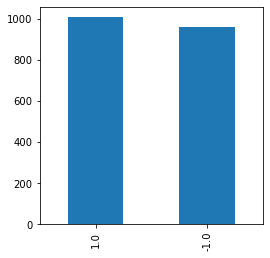

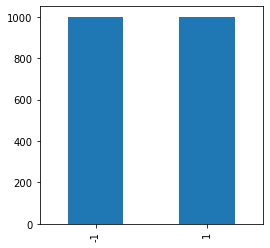

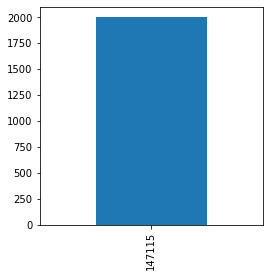

In [17]:
for column in ["Q1", "Q2", "Run"]:
    data[column].value_counts().plot(kind="bar", figsize=(4,4))
    plt.show()

Tworzę selectora i pipeliny

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["Event", "E1", "E2", "px1", "px2", "py1", "py2", "pz1", "pz2", "eta1", "eta2", "phi1", "phi2", "Q1"])),
        ("scaler", MinMaxScaler()),
        ("imputer", SimpleImputer(strategy="most_frequent"))
    ])

In [20]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [21]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["Run"])),
        ("imputer", MinMaxScaler()),
        ("cat_encoder", OneHotEncoder(sparse=False, handle_unknown = 'ignore')),
    ])

In [22]:
num_pipeline.fit_transform(X_train)

array([[0.10856331, 0.01575916, 0.04936633, ..., 0.31480044, 0.23522698,
        0.        ],
       [0.7761345 , 0.20062051, 0.00610414, ..., 0.67707794, 0.33759149,
        0.01851852],
       [0.84400112, 0.00896237, 0.06031119, ..., 0.80238294, 0.80764908,
        0.01851852],
       ...,
       [0.49136811, 0.03821717, 0.28976146, ..., 0.95463622, 0.14001936,
        0.        ],
       [0.43430889, 0.24077801, 0.02729754, ..., 0.95984452, 0.10082998,
        0.01851852],
       [0.33969578, 0.06860989, 0.18232113, ..., 0.86142565, 0.81889699,
        0.        ]])

In [23]:
cat_pipeline.fit_transform(X_train)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [24]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [25]:
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, KFold, GroupKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

kfold = StratifiedKFold(n_splits=10)

In [26]:
print(len(X_train))
print(len(y_train))

1800
1800


In [27]:
y_train

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

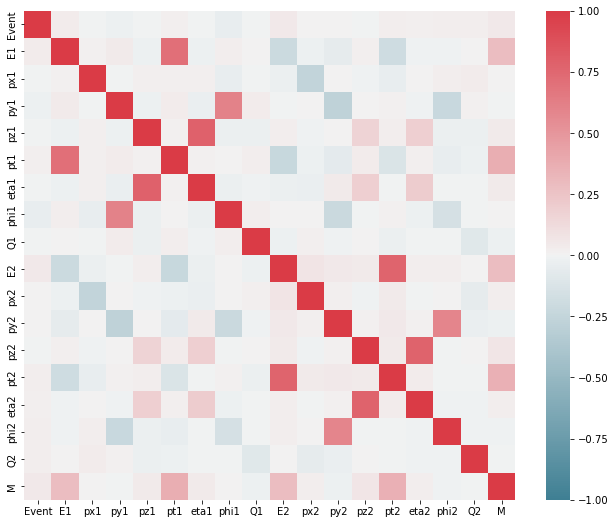

In [28]:
import seaborn as sns

plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(data.loc[:, data.columns != "classification"].corr(), cmap=cmap, vmin=-1, vmax=1)
plt.show()

In [29]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', LinearSVC())])


param_grid = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
}

grid_linearSVC = GridSearchCV(pipe, param_grid, cv=kfold, scoring="accuracy")
grid_linearSVC.fit(X_train, y_train)
grid_linearSVC.best_params_

f:\Anaconda\AnacondaFiles\envs\TFGPU\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
f:\Anaconda\AnacondaFiles\envs\TFGPU\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
f:\Anaconda\AnacondaFiles\envs\TFGPU\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
f:\Anaconda\AnacondaFiles\envs\TFGPU\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
f:\Anaconda\AnacondaFiles\envs\TFGPU\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
f:\Anaconda\AnacondaFiles\envs\TFGPU\lib\site-packages\sklearn\svm\_base.py:1206

{'classifier__C': 10}

In [30]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline), 
    ('classifier', SVC(kernel='rbf'))])

param_grid = {
            'classifier__gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_rbf = GridSearchCV(pipe, param_grid, cv=kfold, scoring="accuracy")

grid_rbf.fit(X_train, y_train)
grid_rbf.best_params_

{'classifier__C': 10, 'classifier__gamma': 1}

In [31]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', SVC(kernel='poly'))])
param_grid = {
            'classifier__degree': [1, 2, 3, 4, 5],
            'classifier__coef0': [0, 1],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_poly = GridSearchCV(pipe, param_grid, cv=kfold, scoring="accuracy")

grid_poly.fit(X_train, y_train)
grid_poly.best_params_

{'classifier__C': 100, 'classifier__coef0': 1, 'classifier__degree': 3}

In [32]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline), 
    ('classifier', LogisticRegression(max_iter=10000))])

param_grid = {
            'classifier__C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
            'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'],
}
grid_logistic = GridSearchCV(pipe, param_grid, cv=kfold, scoring="accuracy")
grid_logistic.fit(X_train, y_train)
grid_logistic.best_params_

f:\Anaconda\AnacondaFiles\envs\TFGPU\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
f:\Anaconda\AnacondaFiles\envs\TFGPU\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
f:\Anaconda\AnacondaFiles\envs\TFGPU\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
f:\Anaconda\AnacondaFiles\envs\TFGPU\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
f:\Anaconda\AnacondaFiles\envs\TFGPU\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
f:\Anaconda\AnacondaFiles\envs\TFGPU\lib\site-pack

{'classifier__C': 1e-05, 'classifier__penalty': 'none'}

In [33]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline), 
    ('classifier', KNeighborsClassifier(n_jobs=-1))])

param_grid = {
            'classifier__p': [0.5, 1, 10, 100, 1000, 10000]
}

grid_kneighbors = GridSearchCV(pipe, param_grid, cv=kfold, scoring="accuracy")

grid_kneighbors.fit(X_train, y_train)
grid_kneighbors.best_params_

f:\Anaconda\AnacondaFiles\envs\TFGPU\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "f:\Anaconda\AnacondaFiles\envs\TFGPU\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "f:\Anaconda\AnacondaFiles\envs\TFGPU\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "f:\Anaconda\AnacondaFiles\envs\TFGPU\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    

{'classifier__p': 1000}

In [34]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline), 
    ('classifier', DecisionTreeClassifier())])

param_grid = {
            'classifier__max_depth': [1, 5, 10, 20],
            'classifier__max_leaf_nodes': [None, 5, 10, 20, 50, 100],
}

grid_decisiontree = GridSearchCV(pipe, param_grid, cv=kfold, scoring="accuracy")

grid_decisiontree.fit(X_train, y_train)
grid_decisiontree.best_params_

{'classifier__max_depth': 20, 'classifier__max_leaf_nodes': None}

In [35]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline), 
    ('classifier', RandomForestClassifier(n_jobs=-1))])

param_grid = {
            'classifier__n_estimators' : [1, 3, 5, 10, 50, 100, 250],
            'classifier__max_leaf_nodes' : [2, 4, 8, 16, 32, 64],
}

grid_randomforest = GridSearchCV(pipe, param_grid, cv=kfold, scoring="accuracy")

grid_randomforest.fit(X_train, y_train)
grid_randomforest.best_params_

{'classifier__max_leaf_nodes': 64, 'classifier__n_estimators': 250}

In [36]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline), 
    ('classifier', BaggingClassifier())])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__max_samples' : [0.05, 0.1, 0.2, 0.5, 0.7, 1, 2]
}

grid_bagging = GridSearchCV(pipe, param_grid, cv=kfold)

grid_bagging.fit(X_train, y_train)
grid_bagging.best_params_

{'classifier__max_samples': 0.5, 'preprocessing': None}

In [37]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline), 
    ('classifier', GradientBoostingClassifier())])

param_grid = {
            'classifier__n_estimators' : [5, 10, 50, 100, 500],
            'classifier__learning_rate' : [0.001, 0.01, 0.1, 0.5, 0.7, 1],
}

grid_gradient = GridSearchCV(pipe, param_grid, cv=kfold, scoring="accuracy")

grid_gradient.fit(X_train, y_train)
grid_gradient.best_params_

{'classifier__learning_rate': 0.01, 'classifier__n_estimators': 50}

In [38]:
pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('classifier', AdaBoostClassifier())])

param_grid = {
            'classifier__n_estimators' : [5, 10, 50, 100, 500, 600, 700],
            'classifier__learning_rate' : [0.001, 0.01, 0.1, 0.5, 0.7, 1],
}

grid_ada = GridSearchCV(pipe, param_grid, cv=kfold, scoring="accuracy")

grid_ada.fit(X_train, y_train)
grid_ada.best_params_

{'classifier__learning_rate': 0.1, 'classifier__n_estimators': 10}

In [39]:
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

models = []
models.append(('LinearSVC', grid_linearSVC.best_estimator_))
models.append(('SVM rbf', grid_rbf.best_estimator_))
models.append(('SVM poly', grid_poly.best_estimator_))
models.append(('Logistic regression', grid_logistic.best_estimator_))
models.append(('KNeighbors', grid_kneighbors.best_estimator_))
models.append(('Decision Tree', grid_decisiontree.best_estimator_))
models.append(('Random Forest', grid_randomforest.best_estimator_))
models.append(('Bagging', grid_bagging.best_estimator_))
models.append(('Gradient', grid_gradient.best_estimator_))
models.append(('Ada Boost', grid_ada.best_estimator_))


vc = VotingClassifier(models)
vc.fit(X_train, y_train)

models.append(('Voting classifier', vc))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test, model.predict(X_test))))
    print("recall_score: {}".format( metrics.recall_score(y_test, model.predict(X_test))))
    print("f1_score: {}".format( metrics.f1_score(y_test, model.predict(X_test))))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model.predict(X_test))))
    precision_score.append(metrics.precision_score(y_test, model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test, model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test, model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))

f:\Anaconda\AnacondaFiles\envs\TFGPU\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
f:\Anaconda\AnacondaFiles\envs\TFGPU\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


LinearSVC
precision_score: 0.45689655172413796
recall_score: 0.5520833333333334
f1_score: 0.5
accuracy_score: 0.47
SVM rbf
precision_score: 0.5229357798165137
recall_score: 0.59375
f1_score: 0.5560975609756098
accuracy_score: 0.545
SVM poly
precision_score: 0.5178571428571429
recall_score: 0.6041666666666666
f1_score: 0.5576923076923077
accuracy_score: 0.54
Logistic regression
precision_score: 0.45614035087719296
recall_score: 0.5416666666666666
f1_score: 0.4952380952380952
accuracy_score: 0.47
KNeighbors
precision_score: 0.4732824427480916
recall_score: 0.6458333333333334
f1_score: 0.5462555066079295
accuracy_score: 0.485
Decision Tree
precision_score: 0.4838709677419355
recall_score: 0.46875
f1_score: 0.47619047619047616
accuracy_score: 0.505
Random Forest
precision_score: 0.550561797752809
recall_score: 0.5104166666666666
f1_score: 0.5297297297297298
accuracy_score: 0.565
Bagging
precision_score: 0.5714285714285714
recall_score: 0.375
f1_score: 0.4528301886792453
accuracy_score: 0.5

In [40]:
X_test

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,M
1596,147115,372920356,1.59566,-0.363551,-1.359100,0.752859,1.40689,0.512406,-1.832170,1.0,44.81100,9.766910,-9.78833,-42.624200,13.82770,-1.844230,-0.786494,13.69970
848,147115,245807604,74.96800,18.515700,30.880300,65.755400,36.00590,1.363110,1.030680,-1.0,121.34100,-24.302300,-41.28930,111.482000,47.91040,1.580940,-2.102780,83.56010
107,147115,484142731,16.19880,-13.442300,-5.704310,-7.011930,14.60260,-0.463418,-2.740270,-1.0,16.92300,2.513450,4.09394,-16.226900,4.80393,-1.931610,1.020190,20.85630
903,147115,125488193,73.43120,11.118400,-8.927680,-72.033400,14.25910,-2.322530,-0.676544,1.0,2.88833,-1.948230,0.29983,-2.111160,1.97116,-0.930713,2.988890,12.98910
1671,147115,484875897,38.61990,21.052500,-9.437700,30.971200,23.07120,1.104050,-0.421434,1.0,5.22977,0.901158,3.65716,3.628170,3.76655,0.855154,1.329200,14.50160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746,147115,291121236,9.09754,2.074020,0.673588,-8.832330,2.18066,-2.106840,0.314028,1.0,80.82040,19.243400,-16.02140,-76.843600,25.03980,-1.840000,-0.694284,7.40806
399,147115,394435047,22.83460,8.936470,-9.573450,18.705800,13.09620,1.154340,-0.819797,-1.0,71.48920,11.619000,-5.19622,70.347000,12.72800,2.410870,-0.420537,18.05270
574,147115,247873264,3.96362,-3.897000,-0.480214,-0.541337,3.92647,-0.137435,-3.018980,-1.0,5.62374,2.298870,-2.95942,-4.193270,3.74740,-0.963056,-0.910364,7.42400
1939,147115,567360363,9.93991,1.173580,-2.543950,-9.536920,2.80160,-1.939030,-1.138570,-1.0,96.18870,7.338980,16.73870,94.436400,18.27690,2.344670,1.157590,61.49320


In [41]:
y_test

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0], dtype=int64)

LinearSVC


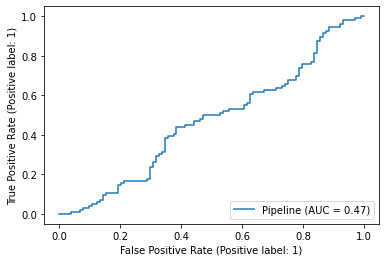

f:\Anaconda\AnacondaFiles\envs\TFGPU\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


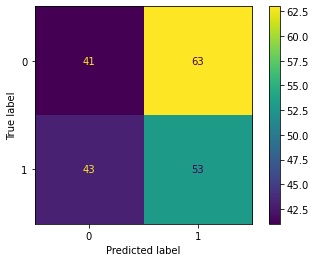

SVM rbf


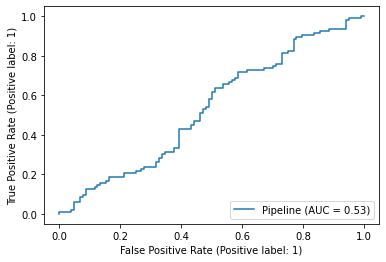

f:\Anaconda\AnacondaFiles\envs\TFGPU\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


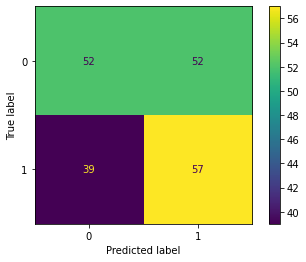

SVM poly


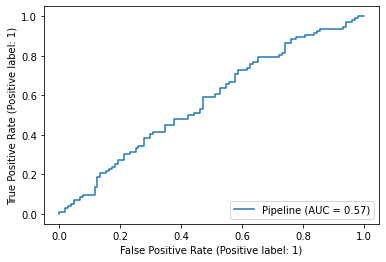

f:\Anaconda\AnacondaFiles\envs\TFGPU\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


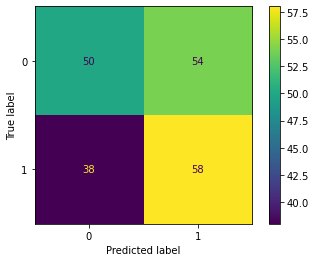

Logistic regression


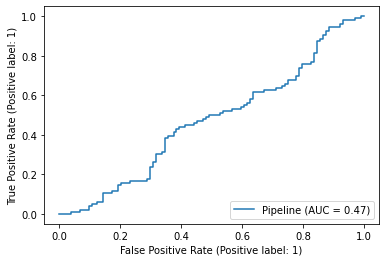

f:\Anaconda\AnacondaFiles\envs\TFGPU\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


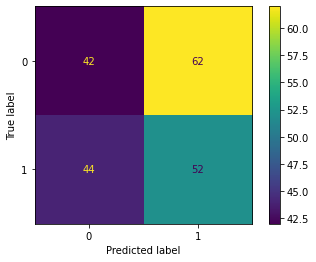

KNeighbors


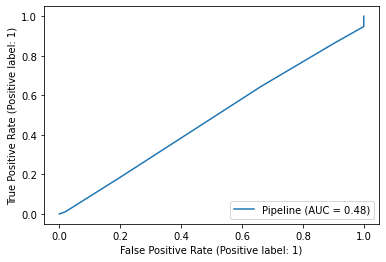

f:\Anaconda\AnacondaFiles\envs\TFGPU\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


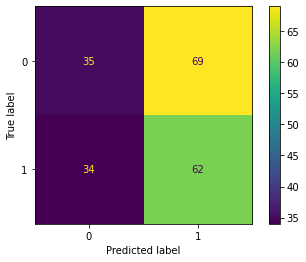

Decision Tree


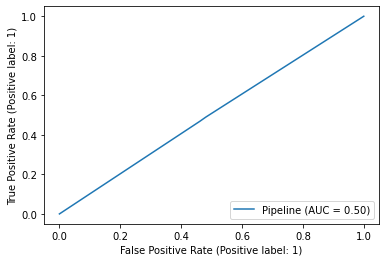

f:\Anaconda\AnacondaFiles\envs\TFGPU\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


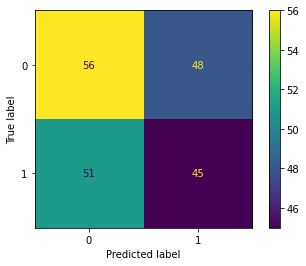

Random Forest


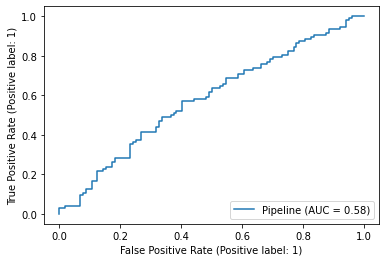

f:\Anaconda\AnacondaFiles\envs\TFGPU\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


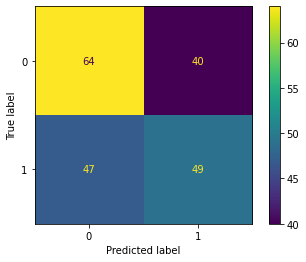

Bagging


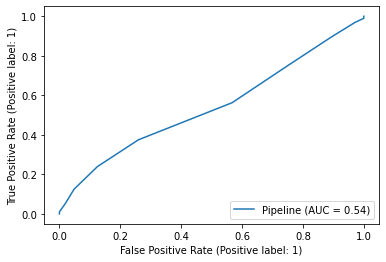

f:\Anaconda\AnacondaFiles\envs\TFGPU\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


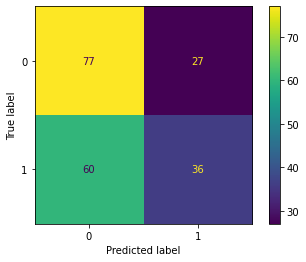

Gradient


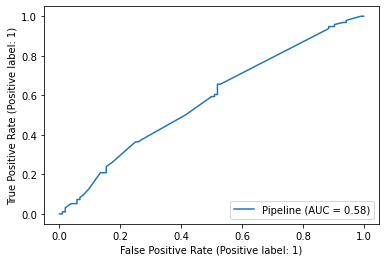

f:\Anaconda\AnacondaFiles\envs\TFGPU\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


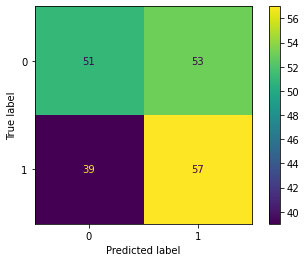

Ada Boost


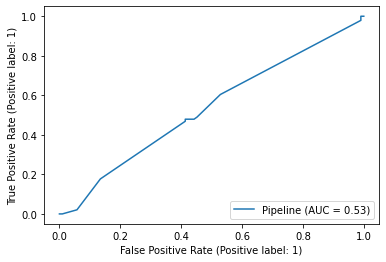

f:\Anaconda\AnacondaFiles\envs\TFGPU\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


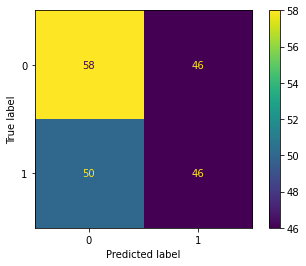

In [42]:
from sklearn.metrics import RocCurveDisplay, plot_confusion_matrix

for model in models[:-1]:
    print(model[0])
    RocCurveDisplay.from_estimator(model[1], X_test, y_test)
    plt.show()
    plot_confusion_matrix(model[1], X_test, y_test)
    plt.show()

# Sieci neuronowe

In [43]:
accuracy_scores = []

In [44]:
from sklearn.linear_model import Perceptron

per_clf = Perceptron(max_iter=1000, tol=1e-3)
per_clf.fit(X_train, y_train)

print("Accurarcy: {}".format( metrics.accuracy_score(y_test, per_clf.predict(X_test)) ))

Accurarcy: 0.48


In [45]:
X_train_with_val, X_val = train_test_split(preprocess_pipeline.transform(X_train), train_size=0.9)
y_train_with_val, y_val = train_test_split(y_train, train_size=0.9)

In [46]:
from sklearn.neural_network import MLPRegressor, MLPClassifier
from tensorflow.keras.callbacks import History

pipeline = Pipeline([('preprocessing', preprocess_pipeline), ('classifier', MLPClassifier())])

param_grid = {
            'classifier__hidden_layer_sizes': [(20,10)],
            'classifier__learning_rate_init': [0.001, 0.01, 0.1],
            'classifier__max_iter': [100, 500, 1000],
            'classifier__batch_size': [8, 16, 32, 64, 128],
}

grid_mlpclass = GridSearchCV(pipeline, param_grid, cv=kfold)

clf = grid_mlpclass.fit(X_train, y_train)
grid_mlpclass.best_params_

f:\Anaconda\AnacondaFiles\envs\TFGPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
f:\Anaconda\AnacondaFiles\envs\TFGPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
f:\Anaconda\AnacondaFiles\envs\TFGPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
f:\Anaconda\AnacondaFiles\envs\TFGPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
f:\Anaconda\AnacondaFile

{'classifier__batch_size': 8,
 'classifier__hidden_layer_sizes': (20, 10),
 'classifier__learning_rate_init': 0.001,
 'classifier__max_iter': 500}

In [47]:
accuracy_scores.append(("MLPClassifier", metrics.accuracy_score(y_true= y_test, y_pred=(clf.predict(X_test) > 0.5).astype("int32"))))

In [48]:
pipeline = Pipeline([('preprocessing', preprocess_pipeline), ('classifier', MLPRegressor())])

param_grid = {
            'classifier__hidden_layer_sizes': [(20,10)],
            'classifier__learning_rate_init': [0.001, 0.01, 0.1],
            'classifier__max_iter': [100, 500, 1000],
            'classifier__batch_size': [8, 16,32],
}

grid_mlpreg = GridSearchCV(pipeline, param_grid, cv=kfold)

clf2 = grid_mlpreg.fit(X_train, y_train)
grid_mlpreg.best_params_

f:\Anaconda\AnacondaFiles\envs\TFGPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
f:\Anaconda\AnacondaFiles\envs\TFGPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
f:\Anaconda\AnacondaFiles\envs\TFGPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
f:\Anaconda\AnacondaFiles\envs\TFGPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
f:\Anaconda\AnacondaFile

{'classifier__batch_size': 32,
 'classifier__hidden_layer_sizes': (20, 10),
 'classifier__learning_rate_init': 0.01,
 'classifier__max_iter': 500}

In [49]:
accuracy_scores.append(("MLPRegressor", metrics.accuracy_score(y_true= y_test, y_pred=(clf2.predict(X_test) > 0.5).astype("int32"))))

In [50]:
# history = History()
# model = Sequential()
# model.add(Dense(10000,activation="elu", input_shape=(X_train_neur.shape[1],)))
# model.add(BatchNormalization())
# model.add(Dense(5000,activation="elu"))
# model.add(BatchNormalization())
# model.add(Dense(2500,activation="elu"))
# model.add(BatchNormalization())
# model.add(Dense(1500,activation="sigmoid"))
# model.add(BatchNormalization())
# model.add(Dense(15,activation="elu"))
# model.add(BatchNormalization())
# model.add(Dense(1,activation="relu"))
# model.summary()

In [51]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from keras.callbacks import EarlyStopping

history = History()
model = Sequential()
model.add(Dense(10000,activation="elu", input_shape=(X_train_with_val.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(5000,activation="selu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(2500,activation="elu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1500,activation="sigmoid"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(15,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))
model.summary()

model.compile(loss="binary_crossentropy",optimizer=keras.optimizers.RMSprop(lr=1e-4), metrics=["accuracy"])
early_stopping = EarlyStopping(monitor='accuracy', patience=10, mode='max', verbose=1)
history = model.fit(X_train_with_val, y_train_with_val, validation_data= (X_val, y_val), batch_size=128,epochs=1000, callbacks=[early_stopping])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10000)             160000    
_________________________________________________________________
batch_normalization (BatchNo (None, 10000)             40000     
_________________________________________________________________
dropout (Dropout)            (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 5000)              50005000  
_________________________________________________________________
batch_normalization_1 (Batch (None, 5000)              20000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 5000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2500)              1

f:\Anaconda\AnacondaFiles\envs\TFGPU\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/1000
13/13 [==============================] - 8s 77ms/step - loss: 0.8429 - accuracy: 0.5019 - val_loss: 0.6926 - val_accuracy: 0.5444
Epoch 2/1000
13/13 [==============================] - 1s 59ms/step - loss: 0.7559 - accuracy: 0.5259 - val_loss: 0.6983 - val_accuracy: 0.5167
Epoch 3/1000
13/13 [==============================] - 1s 60ms/step - loss: 0.7491 - accuracy: 0.5154 - val_loss: 0.7053 - val_accuracy: 0.5167
Epoch 4/1000
13/13 [==============================] - 1s 59ms/step - loss: 0.7533 - accuracy: 0.5278 - val_loss: 0.7146 - val_accuracy: 0.5167
Epoch 5/1000
13/13 [==============================] - 1s 58ms/step - loss: 0.7454 - accuracy: 0.5364 - val_loss: 0.7177 - val_accuracy: 0.5167
Epoch 6/1000
13/13 [==============================] - 1s 59ms/step - loss: 0.7431 - accuracy: 0.5358 - val_loss: 0.7291 - val_accuracy: 0.5167
Epoch 7/1000
13/13 [==============================] - 1s 59ms/step - loss: 0.7498 - accuracy: 0.5358 - val_loss: 0.7263 - val_accuracy: 0.5167

In [52]:
history2 = History()
model2 = Sequential()
model2.add(Dense(10000,activation="elu", input_shape=(X_train_with_val.shape[1],)))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))
model2.add(Dense(5000,activation="elu"))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))
model2.add(Dense(2500,activation="elu"))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))
model2.add(Dense(1500,activation="selu"))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))
model2.add(Dense(15,activation="elu"))
model2.add(BatchNormalization())
model2.add(Dropout(0.6))
model2.add(Dense(1,activation="sigmoid"))
model2.summary()

model2.compile(loss="binary_crossentropy",optimizer=keras.optimizers.RMSprop(lr=1e-4), metrics=["accuracy"])
early_stopping2 = EarlyStopping(monitor='accuracy', patience=10, mode='max', verbose=1)
history2 = model2.fit(X_train_with_val, y_train_with_val, validation_data= (X_val, y_val), batch_size=128,epochs=1000, callbacks=[early_stopping2])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10000)             160000    
_________________________________________________________________
batch_normalization_5 (Batch (None, 10000)             40000     
_________________________________________________________________
dropout_5 (Dropout)          (None, 10000)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 5000)              50005000  
_________________________________________________________________
batch_normalization_6 (Batch (None, 5000)              20000     
_________________________________________________________________
dropout_6 (Dropout)          (None, 5000)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 2500)             

In [53]:
from sklearn import metrics
acc = metrics.accuracy_score(y_true= y_test, y_pred=(model.predict(preprocess_pipeline.transform(X_test)) > 0.5).astype("int32"))
accuracy_scores.append(("Sequential neural network 1", acc))

In [54]:
acc = metrics.accuracy_score(y_true= y_test, y_pred=(model2.predict(preprocess_pipeline.transform(X_test)) > 0.5).astype("int32"))
accuracy_scores.append(("Sequential neural network 2", acc))

In [55]:
for name, accuracy in accuracy_scores:
    print(name)
    print("accuracy_score: {}".format( accuracy ))

MLPClassifier
accuracy_score: 0.53
MLPRegressor
accuracy_score: 0.495
Sequential neural network 1
accuracy_score: 0.515
Sequential neural network 2
accuracy_score: 0.495


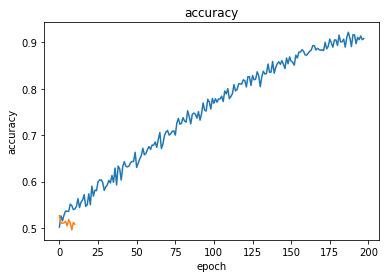

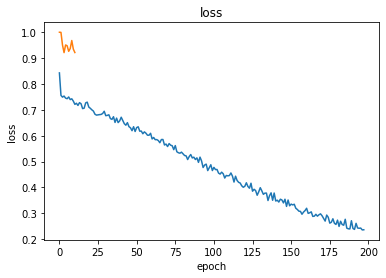

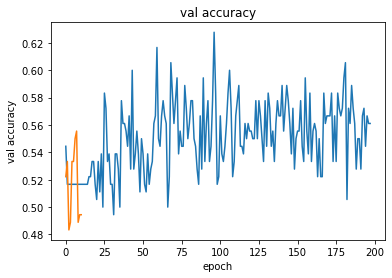

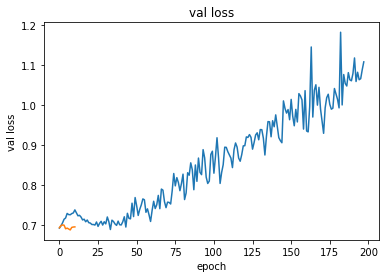

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history2.history['loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('val accuracy')
plt.ylabel('val accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['val_loss'])
plt.plot(history2.history['val_loss'])
plt.title('val loss')
plt.ylabel('val loss')
plt.xlabel('epoch')
plt.show()

MLPClassifier


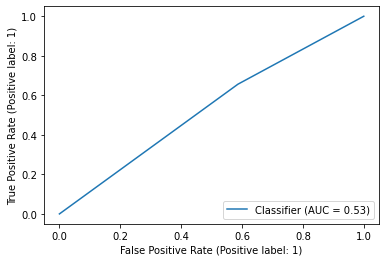

MLPRegressor


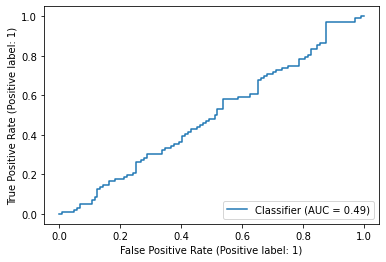

Sequential Model 1


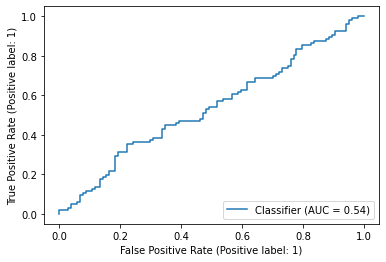

Sequential Model 2


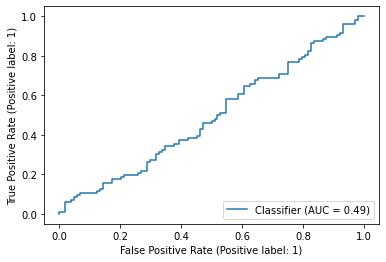

In [57]:
from sklearn.metrics import roc_curve, auc

for mod in [("MLPClassifier", grid_mlpclass.best_estimator_), ("MLPRegressor", grid_mlpreg.best_estimator_)]:
    print(mod[0])
    RocCurveDisplay.from_predictions(y_true=y_test, y_pred=mod[1].predict(X_test))
    plt.show()


for mod in [("Sequential Model 1", model), ("Sequential Model 2", model2)]:
    print(mod[0])
    RocCurveDisplay.from_predictions(y_true=y_test, y_pred=mod[1].predict(preprocess_pipeline.transform(X_test)))
    plt.show()